<a href="https://colab.research.google.com/github/dtoralg/intro_unsupervised/blob/main/notebooks/E3_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio de Análisis de Componentes Principales (PCA): Análisis del Dataset IRIS


El análisis de componentes principales o PCA es una técnica muy utilizada de **reducción dimensional**. Es una técnica lineal, es decir, solo captura **relaciones lineales** entre las variables.

La técnica de PCA busca encontrar unos ejes (llamados componentes principales) que consigan que la **covarianza entre cada par de variables sea cero**.

Adicionalmente estos ejes se **ordenan de mayor a menor varianza**, siendo los primeros componentes principales los que mayor información contienen.

Una vez definidos estos ejes, podemos **eliminar los componentes principales de menor varianza** para conseguir una reducción dimensional que conserva gran parte de la información original.


## Introducción

En este tercer ejercicio vamos a realizar un Análisis de Componentes Principales (PCA), donde aplicaremos técnicas de reducción dimensional para analizar y visualizar el famoso dataset IRIS. PCA es una técnica muy potente que nos permite transformar un conjunto de variables posiblemente correlacionadas en un conjunto más pequeño de variables no correlacionadas, llamadas componentes principales.

### Objetivos del Ejercicio

- **Comprender los conceptos básicos del PCA** y su utilidad en el análisis de datos.
- **Preprocesar los datos** del dataset IRIS para prepararlos adecuadamente para el análisis.
- **Aplicar PCA** para reducir la dimensionalidad de los datos del IRIS.
- **Visualizar los resultados de PCA** en 2D y 3D para interpretar las relaciones entre las muestras.

### Descripción del Dataset IRIS

El dataset IRIS es uno de los conjuntos de datos más conocidos y utilizados en el campo del Machine Learning y la estadística. Contiene 150 muestras de flores, cada una descrita por cuatro características métricas:

- **Sepal Length (cm):** Longitud del sépalo
- **Sepal Width (cm):** Ancho del sépalo
- **Petal Length (cm):** Longitud del pétalo
- **Petal Width (cm):** Ancho del pétalo

Además, cada muestra está etiquetada con una de las tres especies de iris:

- **Iris-setosa**
- **Iris-versicolor**
- **Iris-virginica**

En este ejercicio, utilizaremos las características métricas para realizar PCA y analizaremos cómo las nuevas componentes principales nos ayudan a entender y visualizar mejor los datos.

### Estructura del Notebook

1. **Importación de Librerías y Carga de Datos:** Preparar el entorno de trabajo e importar el dataset IRIS.
2. **Exploración de Datos:** Analizar las características principales del dataset IRIS.
3. **Preprocesamiento de Datos:** Normalizar los datos para asegurar que todas las características contribuyan equitativamente al análisis.
4. **Aplicación de PCA:** Implementar PCA para reducir la dimensionalidad de los datos.
5. **Visualización de Resultados:** Graficar las componentes principales en 2D y 3D para interpretar los clusters formados.
6. **Evaluación de Varianza Explicada:** Analizar la proporción de varianza explicada por cada componente principal.
7. **Discusión y Conclusiones:** Extraer insights y conclusiones a partir de los resultados obtenidos.

### Requisitos

Para seguir este notebook, asegúrate de tener instaladas las siguientes librerías de Python:

- `numpy`
- `pandas`
- `matplotlib`
- `seaborn`
- `scikit-learn`

Puedes instalarlas utilizando el siguiente comando:

```bash
pip install numpy pandas matplotlib seaborn scikit-learn


##### Ejemplo en `sklearn`

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

dataset = load_breast_cancer()

X = dataset.data

# Normalizamos los datos a media 0 y varianza 1, de manera que los componentes
# sean comparables.

# El método fit transform es una utilidad que combina las operaciones fit y
# transform.
X_norm = StandardScaler().fit_transform(X)

# Construimos y entrenamos el algoritmo.
pca = PCA().fit(X_norm)

# Calculamos los datos proyectados en los nuevos ejes.
X_t = pca.transform(X_norm)

Podemos visualizar el porcentaje de varianza explicada por cada componente mediante el atributo `explained_variance_ratio`.

Este gráfico se puede interpretar como la información que retenemos del dataset original si únicamente nos quedamos con $n$ componentes.

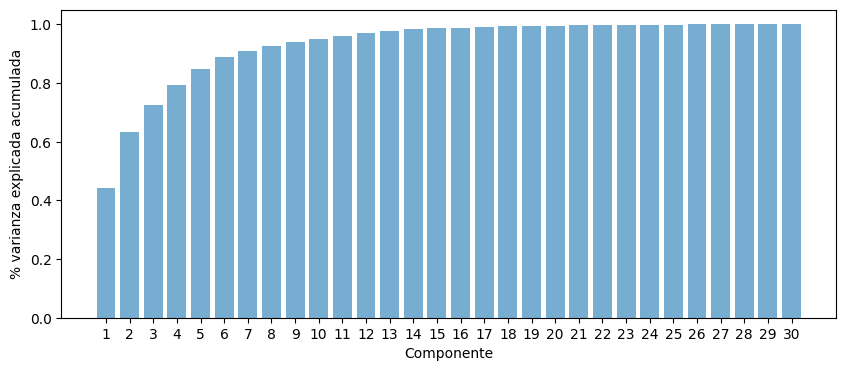

In [ ]:
fig, ax = plt.subplots(figsize = (10, 4))
ax.set_ylabel("% varianza explicada acumulada")
ax.set_xlabel("Componente")
ax.bar(
    [f"{i + 1}" for i in range(pca.n_components_)],
    np.cumsum(pca.explained_variance_ratio_),
    alpha = 0.6
)
plt.show()

En este caso, con el primer componente ya nos quedamos con aproximadamente un 42% de la información.

Si cogemos 15 componentes ya tendríamos prácticamente toda la información explicada. Esto quiere decir que si entrenamos un clasificador con únicamente las 15 primeras columnas del dataset transformado debería tener una *performance* similar a entrenarlo con las 30 columnas de los datos originales, con lo que habríamos reducido la dimensionalidad a la mitad.

También podemos obtener del objeto entrenado los *componentes*, que representan las direcciones de los nuevos ejes creados. También se puede interpretar como el peso que tiene cada variable original sobre cada variable transformada.

In [ ]:
pca.components_[:, 0]

array([ 0.21890244, -0.23385713, -0.00853124,  0.04140896,  0.03778635,
        0.01874079, -0.12408834, -0.0074523 , -0.22310976,  0.09548644,
        0.04147149,  0.05106746,  0.01196721,  0.05950613,  0.05111877,
       -0.15058388,  0.20292425,  0.14671234, -0.22538466, -0.04969866,
       -0.06857001,  0.0729289 , -0.09855269,  0.18257944,  0.0192265 ,
       -0.1294764 , -0.13152667,  0.21119401,  0.21146046, -0.70241409])